# UMAP of Microbial Datasets in Building Materials

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import umap
%matplotlib inline

In [14]:
'''Formatting CLR transformed data file'''
file_loc1 = "16S_OTU_clr_Table_zcomp_ogrows.csv"
OTU_table = pd.read_csv(file_loc1, low_memory=False)

'''t-SNE had an issue with string variables being in the index values of the table
   So, OTUs were reduced to exclusively number values'''
OTU_table['OTU'] = OTU_table['OTU'].replace(to_replace ='New.CleanUp.ReferenceOTU', value = '', regex = True) 
OTU_table['OTU'] = OTU_table['OTU'].replace(to_replace ='New.ReferenceOTU', value = '', regex = True) 

'''Removing duplicates and re-runs
cols = [c for c in OTU_table.columns if not(c.endswith("DUP")) and not(c.endswith("RE"))]
OTU_table=OTU_table[cols]
'''
OTU_table = OTU_table.set_index('OTU')

'''Sample table was transposed to match the format of the mapping table'''
OTU_table = OTU_table.T

OTU_table

OTU,4479944,1050608,4307316,141700,185100,114072,590450,253429,1124709,1081058,...,34699,34757,34791,34796,34821,34824,34826,34840,34867,34905
control.Gypsum.dry.TP0,-0.026489,-0.026489,-0.026489,-0.026489,-0.026489,-0.026489,-0.026489,-0.026489,-0.026489,-0.026489,...,-0.026489,-0.026489,-0.026489,-0.026489,-0.026489,-0.026489,-0.026489,-0.026489,-0.026489,-0.026489
control.Gypsum.dry.TP0.DUP,-0.034900,-0.034900,-0.034900,-0.034900,-0.034900,3.056142,3.702769,-0.034900,-0.034900,-0.034900,...,-0.034900,-0.034900,-0.034900,-0.034900,-0.034900,-0.034900,-0.034900,-0.034900,-0.034900,-0.034900
control.Gypsum.dry.TP1,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613,...,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613
control.Gypsum.dry.TP1.RE,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418,...,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418
control.Gypsum.dry.TP1.RE.DUP,-0.033493,-0.033493,3.991859,-0.033493,-0.033493,-0.033493,-0.033493,-0.033493,-0.033493,-0.033493,...,-0.033493,-0.033493,-0.033493,-0.033493,-0.033493,-0.033493,-0.033493,-0.033493,-0.033493,-0.033493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
loc2.Plywood.wet.TP5.RE.DUP,-0.016893,-0.016893,-0.016893,-0.016893,-0.016893,-0.016893,-0.016893,-0.016893,-0.016893,-0.016893,...,-0.016893,-0.016893,-0.016893,-0.016893,-0.016893,-0.016893,-0.016893,0.676254,-0.016893,-0.016893
loc2.Plywood.wet.TP6,-0.014190,-0.014190,-0.014190,-0.014190,-0.014190,-0.014190,-0.014190,-0.014190,-0.014190,-0.014190,...,-0.014190,-0.014190,0.678957,-0.014190,-0.014190,-0.014190,-0.014190,-0.014190,-0.014190,-0.014190
loc2.Plywood.wet.TP6.DUP,-0.012516,-0.012516,-0.012516,-0.012516,-0.012516,-0.012516,-0.012516,-0.012516,-0.012516,-0.012516,...,-0.012516,-0.012516,-0.012516,-0.012516,-0.012516,-0.012516,-0.012516,-0.012516,-0.012516,-0.012516
loc2.Plywood.wet.TP6.RE,-0.018999,-0.018999,-0.018999,-0.018999,-0.018999,-0.018999,-0.018999,-0.018999,-0.018999,-0.018999,...,-0.018999,-0.018999,-0.018999,-0.018999,-0.018999,-0.018999,-0.018999,-0.018999,-0.018999,-0.018999


In [15]:
'''Mapping table w/ features of interest'''
file_loc2 = "16S_OTU_clr_Table_map.csv"

OTU_map_table = pd.read_csv(file_loc2, names=['location','material','wet_dry','time','ID'], skiprows=1)
OTU_map_table

,location,material,wet_dry,time,ID
control.Gypsum.dry.TP0,control,Gypsum,dry,TP0,control.Gypsum.dry.TP0
control.Gypsum.dry.TP0.DUP,control,Gypsum,dry,TP0,control.Gypsum.dry.TP0.DUP
control.Gypsum.dry.TP1,control,Gypsum,dry,TP1,control.Gypsum.dry.TP1
control.Gypsum.dry.TP1.RE,control,Gypsum,dry,TP1,control.Gypsum.dry.TP1.RE
control.Gypsum.dry.TP1.RE.DUP,control,Gypsum,dry,TP1,control.Gypsum.dry.TP1.RE.DUP
...,...,...,...,...,...
loc2.Plywood.wet.TP5.RE.DUP,loc2,Plywood,wet,TP5,loc2.Plywood.wet.TP5.RE.DUP
loc2.Plywood.wet.TP6,loc2,Plywood,wet,TP6,loc2.Plywood.wet.TP6
loc2.Plywood.wet.TP6.DUP,loc2,Plywood,wet,TP6,loc2.Plywood.wet.TP6.DUP
loc2.Plywood.wet.TP6.RE,loc2,Plywood,wet,TP6,loc2.Plywood.wet.TP6.RE


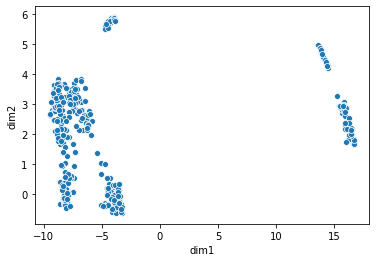

In [23]:
reducer = umap.UMAP(n_components = 2, n_neighbors = 15, metric = 'euclidean', random_state = 0)
embeddings = reducer.fit_transform(OTU_table)
plot_df = pd.DataFrame(data = embeddings, columns = ['dim1', 'dim2'], index = OTU_table.index)
# Like before, we can plot our lower dimensional embedding without labels:
sns.scatterplot(x = 'dim1', y = 'dim2', data = plot_df)

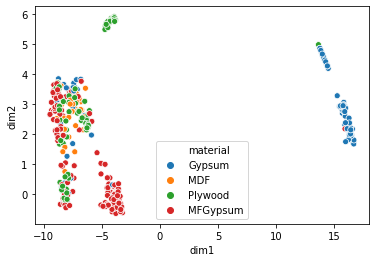

In [24]:
'''Labeled t-SNE as specified by hue'''
plot_df = pd.concat([plot_df, OTU_map_table['material']], axis = 1, sort=False)
sns.scatterplot(x = 'dim1', y = 'dim2', hue = 'material', data = plot_df)